## Data Split

### create different features datasets

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
%matplotlib inline

In [41]:
FEATURES = ("grid_cc", "grid_exg", "grid_ch", "grid_cv")

### load data

In [42]:
# grid cc
with open("./data/train_data/grid_cc.npy", "rb") as fin:
    x_train_grid_cc = np.load(fin)

# grid exg
with open("./data/train_data/grid_exg.npy", "rb") as fin:
    x_train_grid_exg = np.load(fin)

# grid ch
with open("./data/train_data/grid_ch.npy", "rb") as fin:
    x_train_grid_ch = np.load(fin)

# grid cv
with open("./data/train_data/grid_cv.npy", "rb") as fin:
    x_train_grid_cv = np.load(fin)

# yield train
with open("./data/train_data/yield_train.npy", "rb") as fin:
    y_trainset = np.load(fin)

In [43]:
# grid cc
with open("./data/test_data/grid_cc.npy", "rb") as fin:
    x_test_cc = np.load(fin)

# grid exg
with open("./data/test_data/grid_exg.npy", "rb") as fin:
    x_test_exg = np.load(fin)

# grid ch
with open("./data/test_data/grid_ch.npy", "rb") as fin:
    x_test_ch = np.load(fin)

# grid cv
with open("./data/test_data/grid_cv.npy", "rb") as fin:
    x_test_cv = np.load(fin)

# yield test
with open("./data/test_data/yield_test.npy", "rb") as fin:
    y_testset = np.load(fin)

In [44]:
print(x_train_grid_cc.shape)
print(x_train_grid_exg.shape)
print(x_train_grid_ch.shape)
print(x_train_grid_cv.shape)
print(y_trainset.shape)

(7240, 120)
(7240, 120)
(7240, 120)
(7240, 120)
(7240, 1)


In [45]:
print(x_test_cc.shape)
print(x_test_exg.shape)
print(x_test_ch.shape)
print(x_test_cv.shape)
print(y_testset.shape)

(3983, 120)
(3983, 120)
(3983, 120)
(3983, 120)
(3983, 1)


### data preprocess

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer, StandardScaler, PowerTransformer

#### training, validation, and test split

In [47]:
def split_train_test(x, y, test_size=0.3):
    x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=test_size, random_state=42)
    x_valid, x_test, y_valid, y_test = train_test_split(x_valid, y_valid, test_size=0.5, random_state=43)
    return x_train, x_valid, x_test, y_train, y_valid, y_test

In [48]:
x_train_grid_cc, x_valid_grid_cc, x_test_grid_cc,  y_train_grid_cc,  y_valid_grid_cc,  y_test_grid_cc = split_train_test(x_train_grid_cc, y_trainset)

In [49]:
x_train_grid_exg, x_valid_grid_exg, x_test_grid_exg,  y_train_grid_exg,  y_valid_grid_exg,  y_test_grid_exg = split_train_test(x_train_grid_exg, y_trainset)

In [50]:
x_train_grid_ch, x_valid_grid_ch, x_test_grid_ch,  y_train_grid_ch,  y_valid_grid_ch,  y_test_grid_ch = split_train_test(x_train_grid_ch, y_trainset)

In [51]:
x_train_grid_cv, x_valid_grid_cv, x_test_grid_cv,  y_train_grid_cv,  y_valid_grid_cv,  y_test_grid_cv = split_train_test(x_train_grid_cv, y_trainset)

#### check y values

In [52]:
all(y_train_grid_cc == y_train_grid_exg), all(y_train_grid_cc == y_train_grid_ch), all(y_train_grid_cc == y_train_grid_cv),

(True, True, True)

In [53]:
all(y_valid_grid_cc == y_valid_grid_exg), all(y_valid_grid_cc == y_valid_grid_ch), all(y_valid_grid_cc == y_valid_grid_cv),

(True, True, True)

In [54]:
all(y_test_grid_cc == y_test_grid_exg), all(y_test_grid_cc == y_test_grid_ch), all(y_test_grid_cc == y_test_grid_cv),

(True, True, True)

#### standardize, normalize, and power-transform

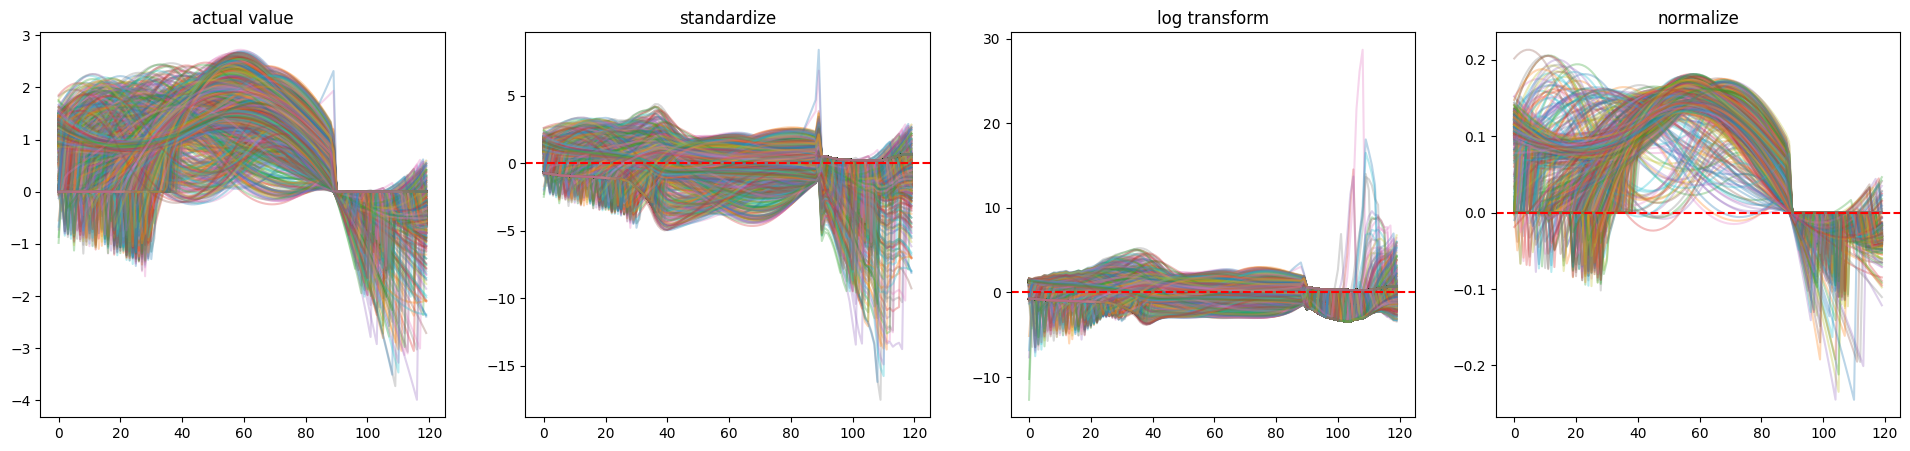

In [56]:
standardize_scaler = StandardScaler()
power_scaler = PowerTransformer()
normalize_scaler = Normalizer()

test_standardize = standardize_scaler.fit_transform(x_train_grid_cc)
test_power = power_scaler.fit_transform(x_train_grid_cc)
test_normalize = normalize_scaler.fit_transform(x_test_grid_cc)

fig, axes = plt.subplots(ncols=4, figsize=(24, 5))
axes[0].plot(x_train_grid_cc.T, alpha=0.3)
axes[0].set_title("actual value")

axes[1].plot(test_standardize.T, alpha=0.3)
axes[1].set_title("standardize")
axes[1].axhline(y=0, color="red", linestyle="--")

axes[2].plot(test_power.T, alpha=0.3)
axes[2].set_title("log transform")
axes[2].axhline(y=0, color="red", linestyle="--")

axes[3].plot(test_normalize.T, alpha=0.3)
axes[3].set_title("normalize")
axes[3].axhline(y=0, color="red", linestyle="--");

#### try to see the combination

##### log-transform + standardize

In [57]:
test_power_standardize = standardize_scaler.fit_transform(test_power)

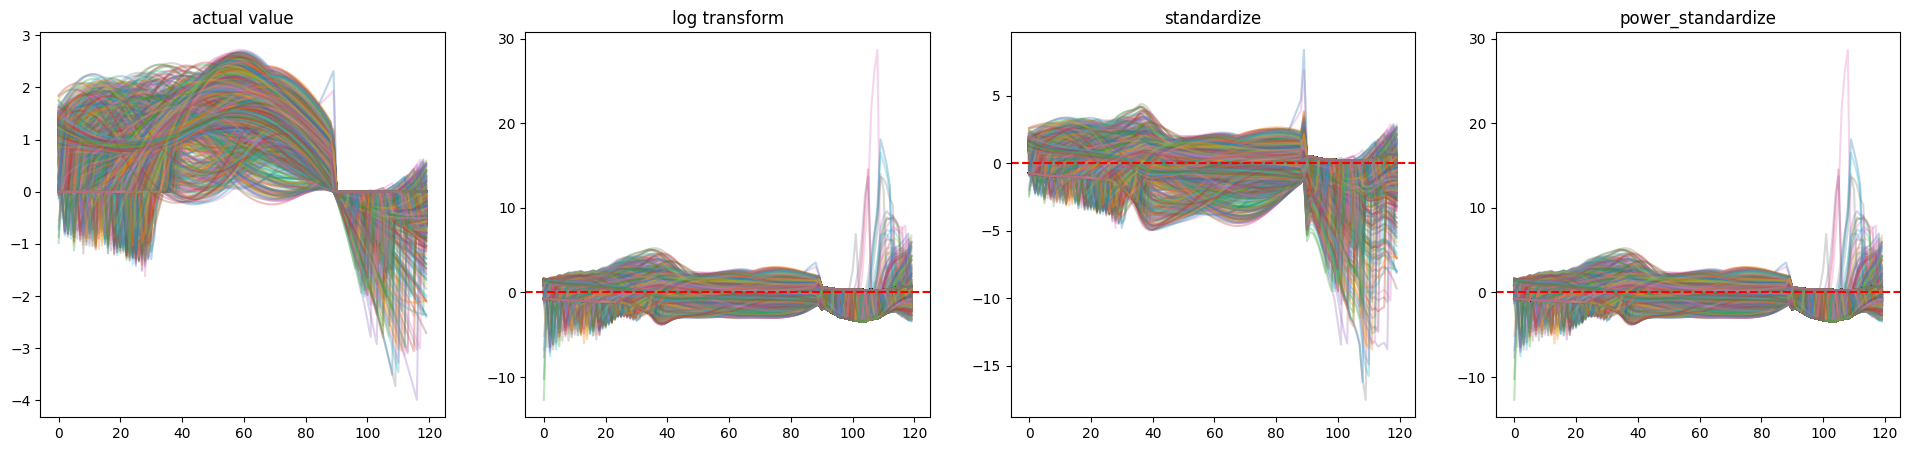

In [58]:
fig, axes = plt.subplots(ncols=4, figsize=(24, 5))
axes[0].plot(x_train_grid_cc.T, alpha=0.3)
axes[0].set_title("actual value")

axes[2].plot(test_standardize.T, alpha=0.3)
axes[2].set_title("standardize")
axes[2].axhline(y=0, color="red", linestyle="--")

axes[1].plot(test_power.T, alpha=0.3)
axes[1].set_title("log transform")
axes[1].axhline(y=0, color="red", linestyle="--")

axes[3].plot(test_power_standardize.T, alpha=0.3)
axes[3].set_title("power_standardize")
axes[3].axhline(y=0, color="red", linestyle="--");

##### log-transform + normalize

In [59]:
test_power_normalize = normalize_scaler.fit_transform(test_power)

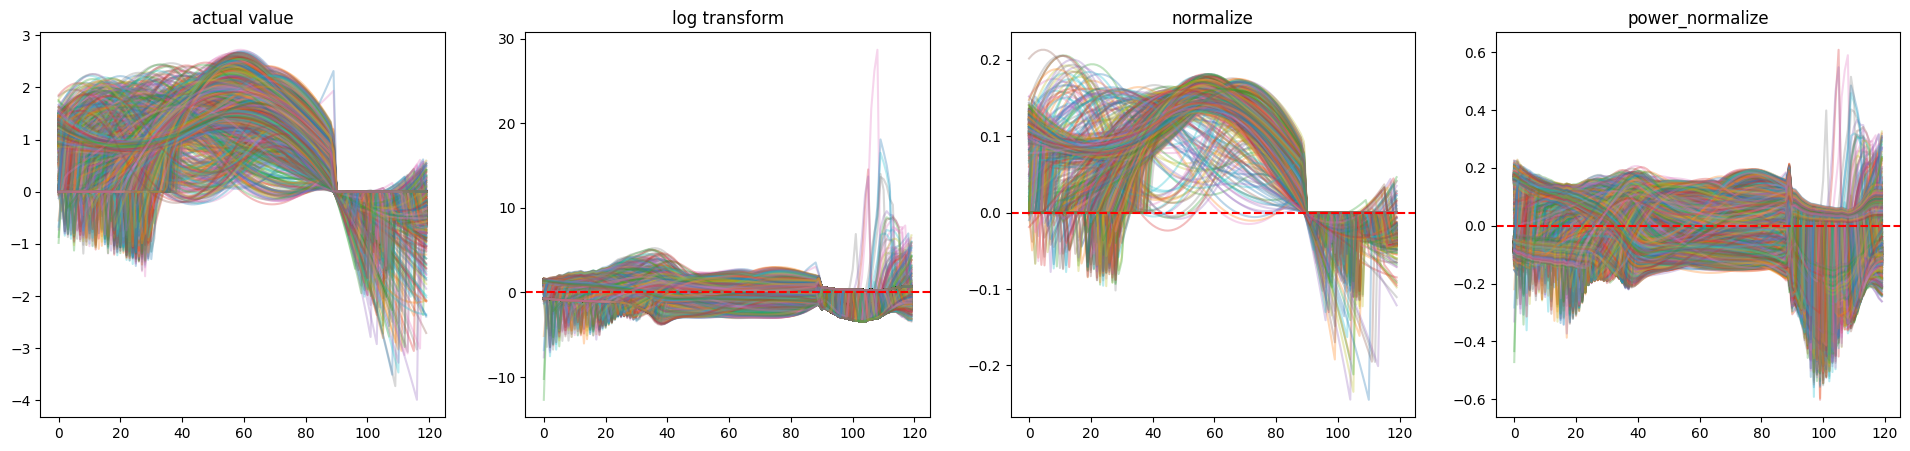

In [60]:
fig, axes = plt.subplots(ncols=4, figsize=(24, 5))
axes[0].plot(x_train_grid_cc.T, alpha=0.3)
axes[0].set_title("actual value")

axes[1].plot(test_power.T, alpha=0.3)
axes[1].set_title("log transform")
axes[1].axhline(y=0, color="red", linestyle="--")

axes[2].plot(test_normalize.T, alpha=0.3)
axes[2].set_title("normalize")
axes[2].axhline(y=0, color="red", linestyle="--");

axes[3].plot(test_power_normalize.T, alpha=0.3)
axes[3].set_title("power_normalize")
axes[3].axhline(y=0, color="red", linestyle="--");

##### standardize + normalize

In [61]:
test_standardize_normalize = normalize_scaler.fit_transform(test_standardize)

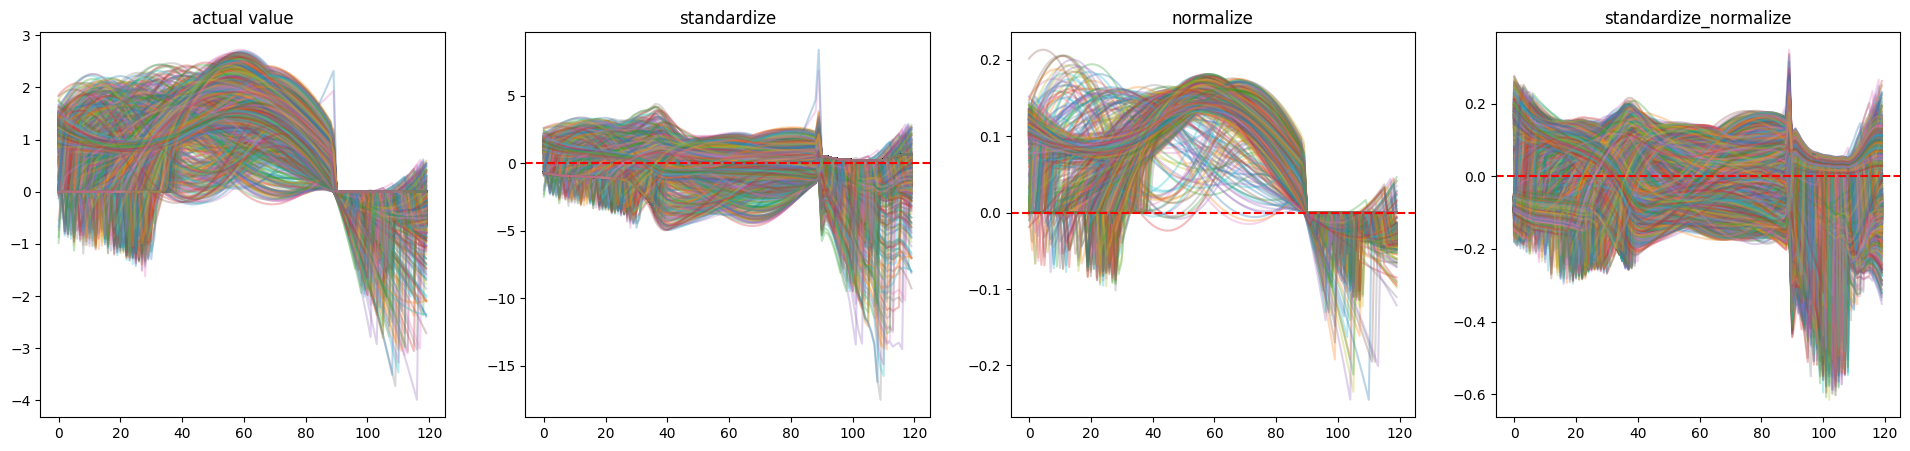

In [62]:
fig, axes = plt.subplots(ncols=4, figsize=(24, 5))
axes[0].plot(x_train_grid_cc.T, alpha=0.3)
axes[0].set_title("actual value")

axes[1].plot(test_standardize.T, alpha=0.3)
axes[1].set_title("standardize")
axes[1].axhline(y=0, color="red", linestyle="--")

axes[2].plot(test_normalize.T, alpha=0.3)
axes[2].set_title("normalize")
axes[2].axhline(y=0, color="red", linestyle="--");

axes[3].plot(test_standardize_normalize.T, alpha=0.3)
axes[3].set_title("standardize_normalize")
axes[3].axhline(y=0, color="red", linestyle="--");

##### normalize + standardize

In [63]:
test_normalize_standardzie = standardize_scaler.fit_transform(test_normalize)

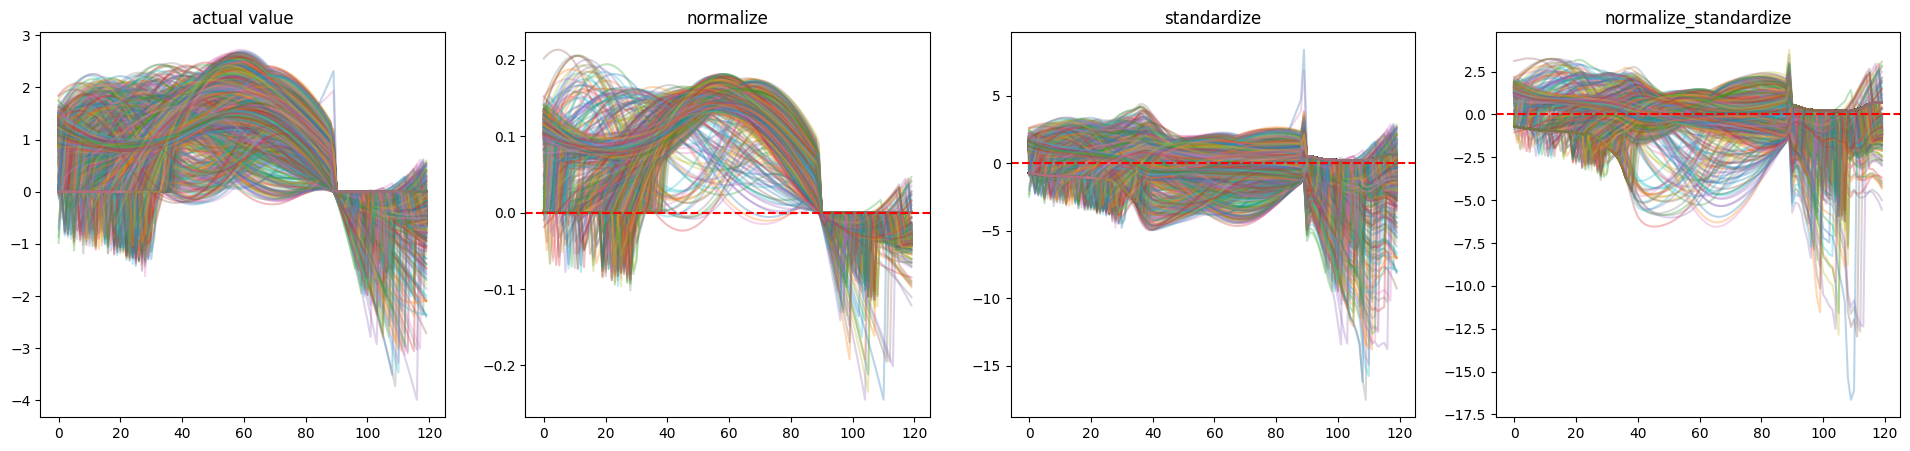

In [64]:
fig, axes = plt.subplots(ncols=4, figsize=(24, 5))
axes[0].plot(x_train_grid_cc.T, alpha=0.3)
axes[0].set_title("actual value")

axes[1].plot(test_normalize.T, alpha=0.3)
axes[1].set_title("normalize")
axes[1].axhline(y=0, color="red", linestyle="--")

axes[2].plot(test_standardize.T, alpha=0.3)
axes[2].set_title("standardize")
axes[2].axhline(y=0, color="red", linestyle="--");

axes[3].plot(test_normalize_standardzie.T, alpha=0.3)
axes[3].set_title("normalize_standardize")
axes[3].axhline(y=0, color="red", linestyle="--");

### Summary

based on the result:
1. standardzie + normal seems to give the better result 

### preprocess data

#### use standardize + normalize

In [65]:
standardize_scaler_cc = StandardScaler()
normalize_scaler_cc = Normalizer()

x_train_grid_cc = standardize_scaler_cc.fit_transform(x_train_grid_cc)
x_train_grid_cc = normalize_scaler_cc.fit_transform(x_train_grid_cc)


x_valid_grid_cc = standardize_scaler_cc.transform(x_valid_grid_cc)
x_valid_grid_cc = normalize_scaler_cc.transform(x_valid_grid_cc)

x_test_grid_cc = standardize_scaler_cc.transform(x_test_grid_cc)
x_test_grid_cc = normalize_scaler_cc.transform(x_test_grid_cc)

x_test_cc = standardize_scaler_cc.transform(x_test_cc)
x_test_cc = normalize_scaler_cc.transform(x_test_cc)

In [66]:
standardize_scaler_exg = StandardScaler()
normalize_scaler_exg = Normalizer()

x_train_grid_exg = standardize_scaler_exg.fit_transform(x_train_grid_exg)
x_train_grid_exg = normalize_scaler_exg.fit_transform(x_train_grid_exg)


x_valid_grid_exg = standardize_scaler_exg.transform(x_valid_grid_exg)
x_valid_grid_exg = normalize_scaler_exg.transform(x_valid_grid_exg)

x_test_grid_exg = standardize_scaler_exg.transform(x_test_grid_exg)
x_test_grid_exg = normalize_scaler_exg.transform(x_test_grid_exg)

x_test_exg = standardize_scaler_exg.transform(x_test_exg)
x_test_exg = normalize_scaler_exg.transform(x_test_exg)

In [67]:
standardize_scaler_ch = StandardScaler()
normalize_scaler_ch = Normalizer()

x_train_grid_ch = standardize_scaler_ch.fit_transform(x_train_grid_ch)
x_train_grid_ch = normalize_scaler_ch.fit_transform(x_train_grid_ch)


x_valid_grid_ch = standardize_scaler_ch.transform(x_valid_grid_ch)
x_valid_grid_ch = normalize_scaler_ch.transform(x_valid_grid_ch)

x_test_grid_ch = standardize_scaler_ch.transform(x_test_grid_ch)
x_test_grid_ch = normalize_scaler_ch.transform(x_test_grid_ch)

x_test_ch = standardize_scaler_ch.transform(x_test_ch)
x_test_ch = normalize_scaler_ch.transform(x_test_ch)

In [68]:
standardize_scaler_cv = StandardScaler()
normalize_scaler_cv = Normalizer()

x_train_grid_cv = standardize_scaler_cv.fit_transform(x_train_grid_cv)
x_train_grid_cv = normalize_scaler_cv.fit_transform(x_train_grid_cv)


x_valid_grid_cv = standardize_scaler_cv.transform(x_valid_grid_cv)
x_valid_grid_cv = normalize_scaler_cv.transform(x_valid_grid_cv)

x_test_grid_cv = standardize_scaler_cv.transform(x_test_grid_cv)
x_test_grid_cv = normalize_scaler_cv.transform(x_test_grid_cv)

x_test_cv = standardize_scaler_cv.transform(x_test_cv)
x_test_cv = normalize_scaler_cv.transform(x_test_cv)

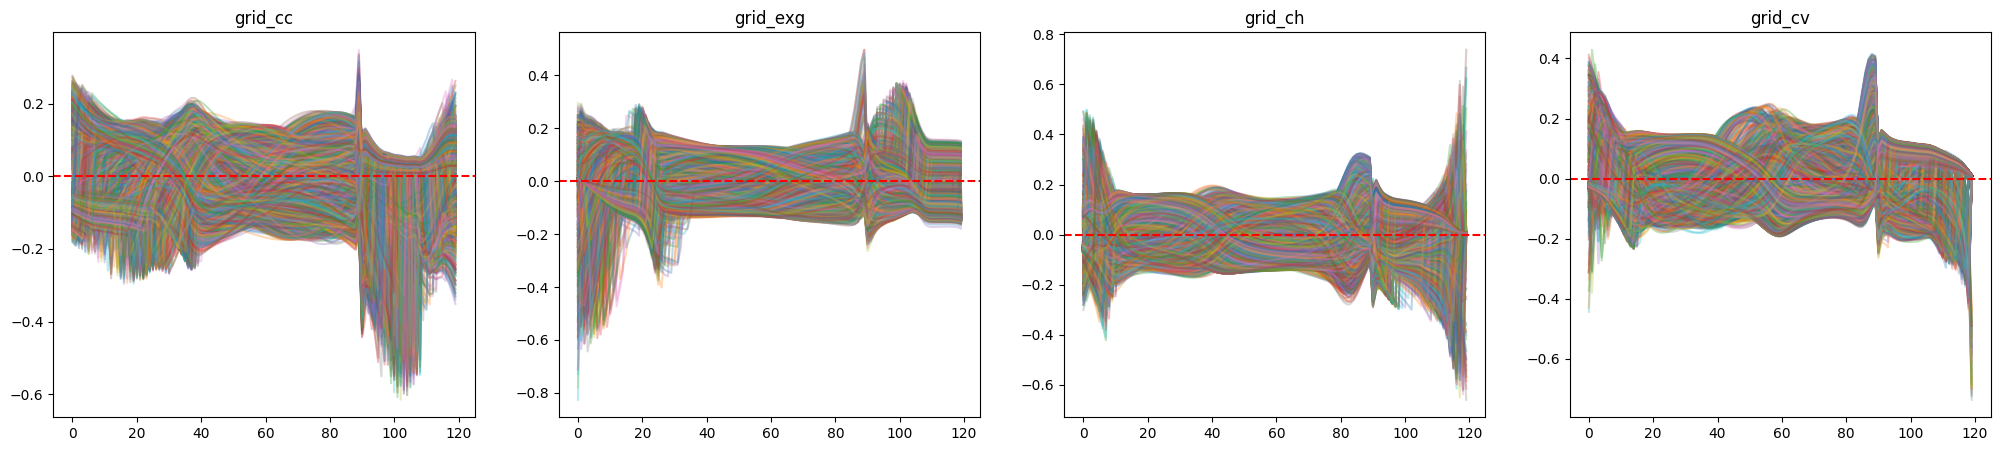

In [69]:
fig, axes = plt.subplots(ncols=4, figsize=(25, 5))

axes[0].plot(x_train_grid_cc.T, alpha=0.3);
axes[0].set_title("grid_cc")
axes[0].axhline(y=0, linestyle="--", color="red");

axes[1].plot(x_train_grid_exg.T, alpha=0.3);
axes[1].set_title("grid_exg")
axes[1].axhline(y=0, linestyle="--", color="red");

axes[2].plot(x_train_grid_ch.T, alpha=0.3);
axes[2].set_title("grid_ch")
axes[2].axhline(y=0, linestyle="--", color="red");

axes[3].plot(x_train_grid_cv.T, alpha=0.3);
axes[3].set_title("grid_cv")
axes[3].axhline(y=0, linestyle="--", color="red");

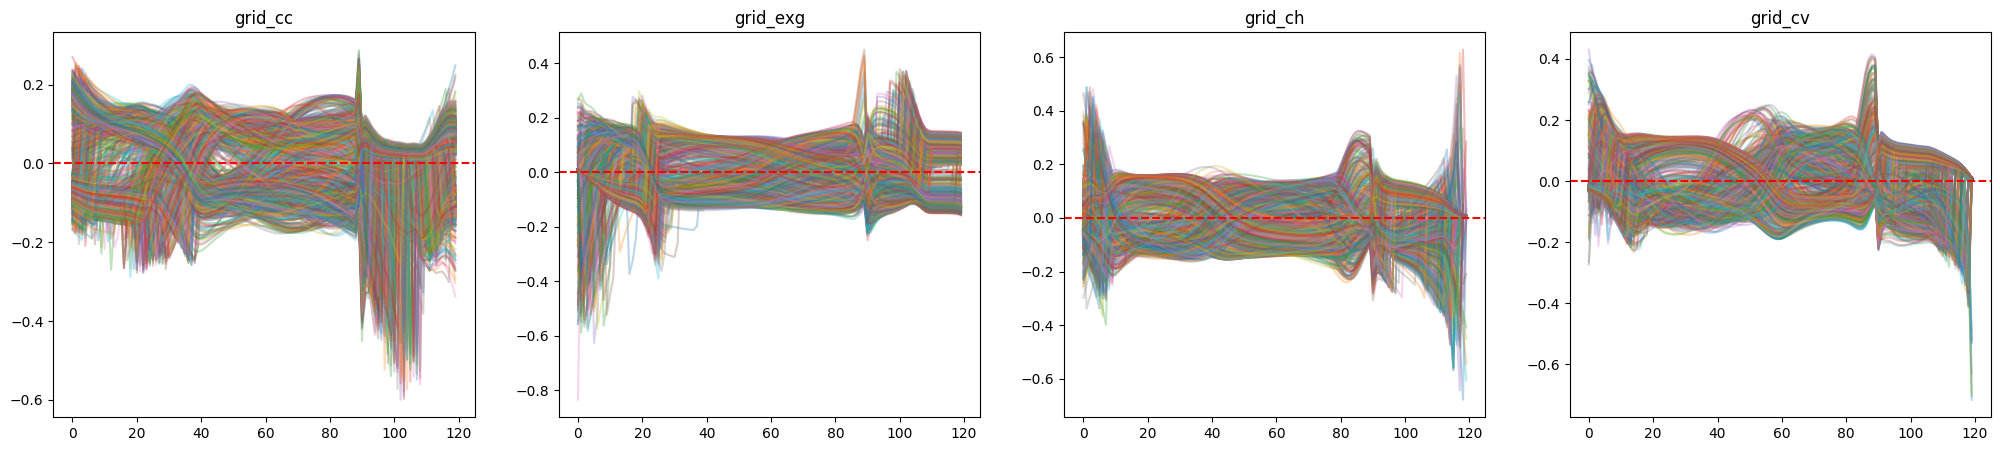

In [70]:
fig, axes = plt.subplots(ncols=4, figsize=(25, 5))

axes[0].plot(x_valid_grid_cc.T, alpha=0.3);
axes[0].set_title("grid_cc")
axes[0].axhline(y=0, linestyle="--", color="red");

axes[1].plot(x_valid_grid_exg.T, alpha=0.3);
axes[1].set_title("grid_exg")
axes[1].axhline(y=0, linestyle="--", color="red");

axes[2].plot(x_valid_grid_ch.T, alpha=0.3);
axes[2].set_title("grid_ch")
axes[2].axhline(y=0, linestyle="--", color="red");

axes[3].plot(x_valid_grid_cv.T, alpha=0.3);
axes[3].set_title("grid_cv")
axes[3].axhline(y=0, linestyle="--", color="red");

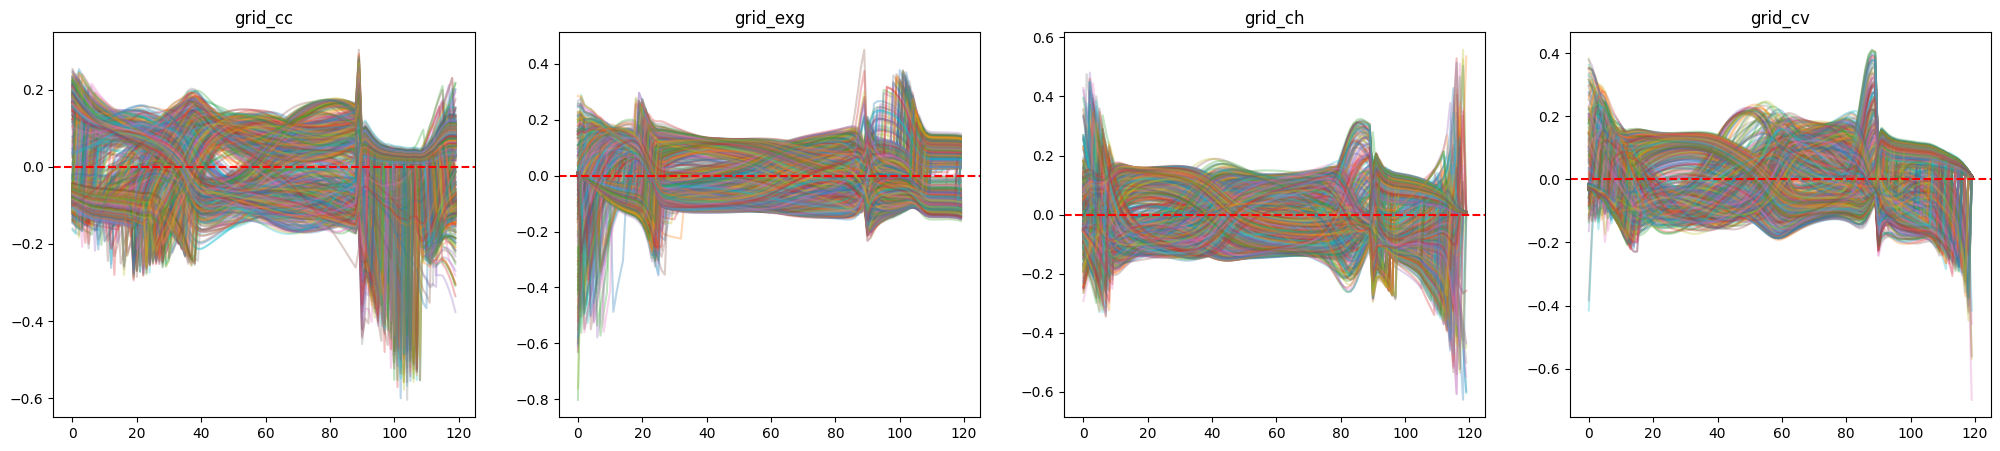

In [71]:
fig, axes = plt.subplots(ncols=4, figsize=(25, 5))

axes[0].plot(x_test_grid_cc.T, alpha=0.3);
axes[0].set_title("grid_cc")
axes[0].axhline(y=0, linestyle="--", color="red");

axes[1].plot(x_test_grid_exg.T, alpha=0.3);
axes[1].set_title("grid_exg")
axes[1].axhline(y=0, linestyle="--", color="red");

axes[2].plot(x_test_grid_ch.T, alpha=0.3);
axes[2].set_title("grid_ch")
axes[2].axhline(y=0, linestyle="--", color="red");

axes[3].plot(x_test_grid_cv.T, alpha=0.3);
axes[3].set_title("grid_cv")
axes[3].axhline(y=0, linestyle="--", color="red");

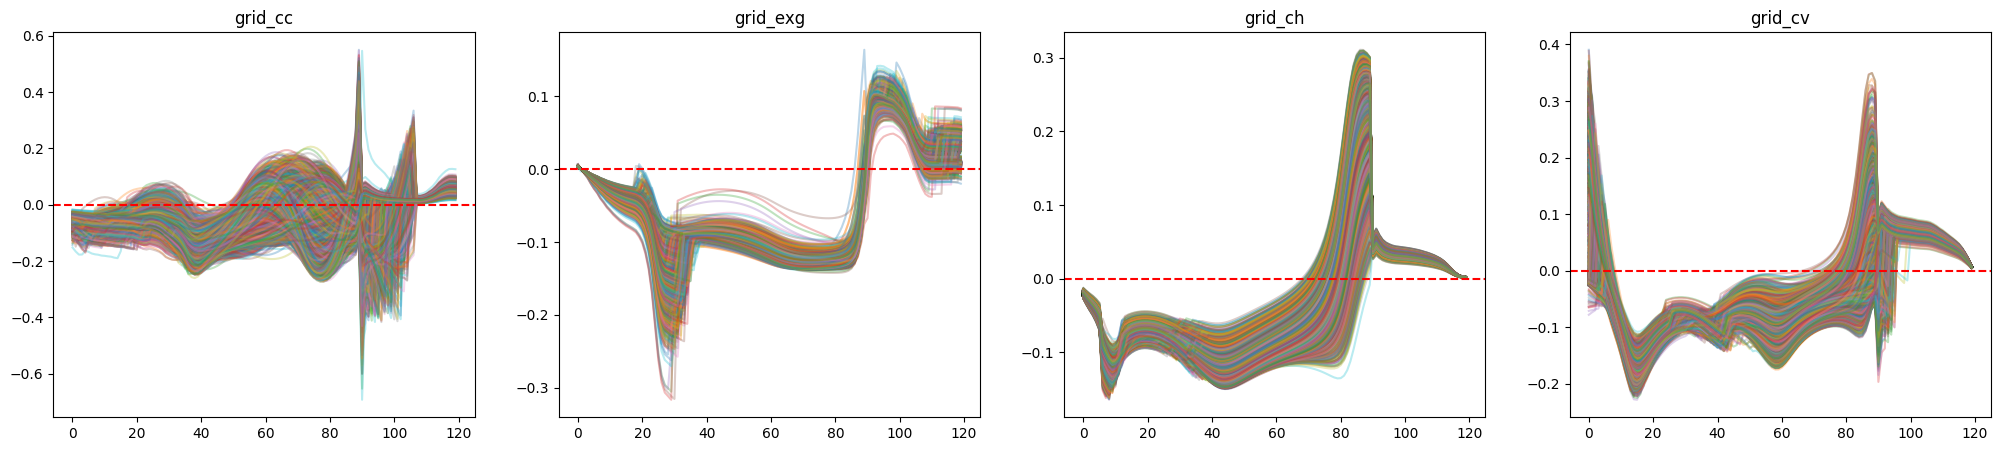

In [72]:
fig, axes = plt.subplots(ncols=4, figsize=(25, 5))

axes[0].plot(x_test_cc.T, alpha=0.3);
axes[0].set_title("grid_cc")
axes[0].axhline(y=0, linestyle="--", color="red");

axes[1].plot(x_test_exg.T, alpha=0.3);
axes[1].set_title("grid_exg")
axes[1].axhline(y=0, linestyle="--", color="red");

axes[2].plot(x_test_ch.T, alpha=0.3);
axes[2].set_title("grid_ch")
axes[2].axhline(y=0, linestyle="--", color="red");

axes[3].plot(x_test_cv.T, alpha=0.3);
axes[3].set_title("grid_cv")
axes[3].axhline(y=0, linestyle="--", color="red");

### save data

##### train

In [73]:
with open("./standard_normal_data/train/grid_cc.npy", "wb") as fin:
    np.save(fin, x_train_grid_cc)
    
with open("./standard_normal_data/train/grid_exg.npy", "wb") as fin:
    np.save(fin, x_train_grid_exg)
    
with open("./standard_normal_data/train/grid_ch.npy", "wb") as fin:
    np.save(fin, x_train_grid_ch)
    
with open("./standard_normal_data/train/grid_cv.npy", "wb") as fin:
    np.save(fin, x_train_grid_cv)

with open("./standard_normal_data/train/yield_train.npy", "wb") as fin:
    np.save(fin, y_train_grid_cc)

##### validation

In [74]:
with open("./standard_normal_data/valid/grid_cc.npy", "wb") as fin:
    np.save(fin, x_valid_grid_cc)
    
with open("./standard_normal_data/valid/grid_exg.npy", "wb") as fin:
    np.save(fin, x_valid_grid_exg)
    
with open("./standard_normal_data/valid/grid_ch.npy", "wb") as fin:
    np.save(fin, x_valid_grid_ch)
    
with open("./standard_normal_data/valid/grid_cv.npy", "wb") as fin:
    np.save(fin, x_valid_grid_cv)

with open("./standard_normal_data/valid/yield_valid.npy", "wb") as fin:
    np.save(fin, y_valid_grid_cc)

##### test

In [75]:
with open("./standard_normal_data/test/grid_cc.npy", "wb") as fin:
    np.save(fin, x_test_grid_cc)
    
with open("./standard_normal_data/test/grid_exg.npy", "wb") as fin:
    np.save(fin, x_test_grid_exg)
    
with open("./standard_normal_data/test/grid_ch.npy", "wb") as fin:
    np.save(fin, x_test_grid_ch)
    
with open("./standard_normal_data/test/grid_cv.npy", "wb") as fin:
    np.save(fin, x_test_grid_cv)

with open("./standard_normal_data/test/yield_test.npy", "wb") as fin:
    np.save(fin, y_test_grid_cc)

##### cross year test

In [76]:
with open("./standard_normal_data/cross_year_test/grid_cc.npy", "wb") as fin:
    np.save(fin, x_test_cc)
    
with open("./standard_normal_data/cross_year_test/grid_exg.npy", "wb") as fin:
    np.save(fin, x_test_exg)
    
with open("./standard_normal_data/cross_year_test/grid_ch.npy", "wb") as fin:
    np.save(fin, x_test_ch)
    
with open("./standard_normal_data/cross_year_test/grid_cv.npy", "wb") as fin:
    np.save(fin, x_test_cv)

with open("./standard_normal_data/cross_year_test/yield_test.npy", "wb") as fin:
    np.save(fin, y_testset)